# Importing Libraries

In [104]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Data Preprocessing

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(768, 9)

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

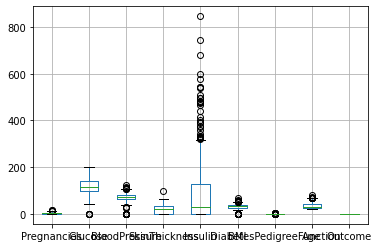

In [10]:
df.plot.box(grid='True')

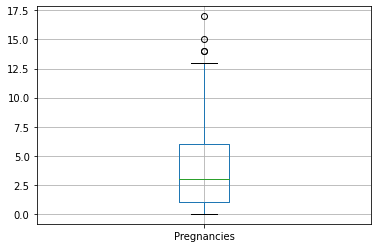

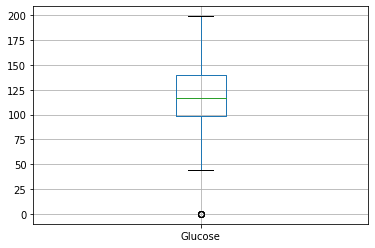

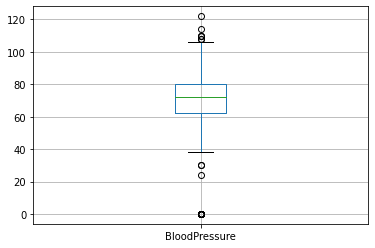

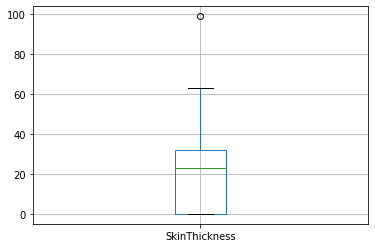

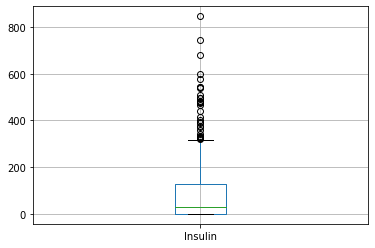

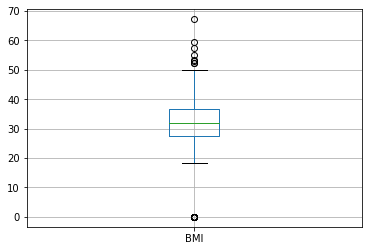

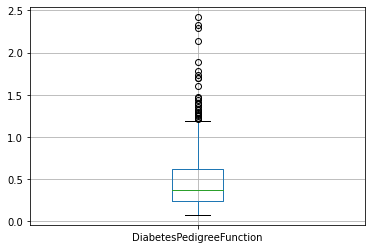

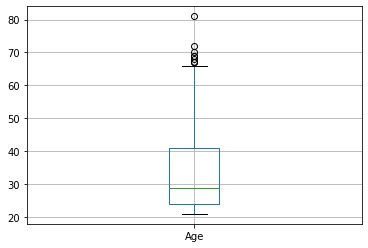

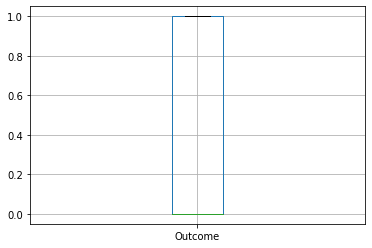

In [11]:
for i in df.columns:
    df.boxplot(column=i)
    plt.show()

In [87]:
min_thresold_Pregnancies = 0
max_thresold_Pregnancies = 15

min_thresold_Glucose = df.Glucose.quantile(0.001)
max_thresold_Glucose = df.Glucose.quantile(0.999)

min_thresold_DiabetesPedigreeFunction = df.DiabetesPedigreeFunction.quantile(0.001)
max_thresold_DiabetesPedigreeFunction = df.DiabetesPedigreeFunction.quantile(0.999)


In [88]:
df2= df[(df.DiabetesPedigreeFunction < max_thresold_DiabetesPedigreeFunction) & (df.Glucose < max_thresold_Glucose) & (df.Pregnancies < max_thresold_Pregnancies)]
df2.shape

(764, 9)

In [89]:
x=df2.drop('Outcome',axis=1)
y=df2['Outcome']

# Feature Selection using SelectKBest with chi2

In [90]:
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(x,y)

In [91]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [92]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features','Score']

In [93]:
featureScores

,features,Score
0,Pregnancies,103.947766
1,Glucose,1362.970934
2,BloodPressure,16.810160
3,SkinThickness,39.421663
4,Insulin,2236.677231
5,BMI,118.934733
6,DiabetesPedigreeFunction,4.546632
7,Age,182.178954


In [94]:
print(featureScores.nlargest(5,'Score'))

      features        Score
4      Insulin  2236.677231
1      Glucose  1362.970934
7          Age   182.178954
5          BMI   118.934733
0  Pregnancies   103.947766


In [95]:
x=x.drop(["DiabetesPedigreeFunction","SkinThickness","BloodPressure"],axis=1)

# OverSampling the Imbalance Data Set

In [96]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [97]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(1)
X_train,y_train = os.fit_resample(X_train,y_train)

In [98]:
print(y_train.value_counts())
print(X_train.value_counts())

1    402
0    402
Name: Outcome, dtype: int64
Pregnancies  Glucose  Insulin  BMI   Age
10           129      0        41.2  38     5
9            164      0        32.8  45     5
7            109      0        35.9  43     4
8            100      215      39.4  43     4
0            123      0        36.3  52     4
                                           ..
4            132      0        32.9  23     1
             137      0        31.2  30     1
             141      0        27.6  40     1
             144      140      29.5  37     1
0            57       0        21.7  67     1
Length: 611, dtype: int64


# Prediction before Tuning HyperParameters 

In [145]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred) 
accuracies = cross_val_score(estimator = dtc, X = X_train, y = y_train, cv = StratifiedKFold(10)) 
np.average(accuracies)

0.8097685185185186

In [147]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)  
accuracies = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = StratifiedKFold(10)) 
np.average(accuracies)

0.8583796296296295

In [110]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)  
accuracies = cross_val_score(estimator = svm, X = X_train, y = y_train, cv = StratifiedKFold(10)) 
np.average(accuracies)

0.7275617283950617

In [158]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)  
accuracies = cross_val_score(estimator = gnb, X = X_train, y = y_train, cv = StratifiedKFold(10)) 
np.average(accuracies)

0.7411728395061729

In [165]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)  
accuracies = cross_val_score(estimator = bnb, X = X_train, y = y_train, cv = StratifiedKFold(10)) 
np.average(accuracies)

0.5060956790123456

# Predicting by Tuning HyperParameters using GridSearchCV

In [111]:
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator =svm,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = StratifiedKFold(10),
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [113]:
 grid_search.best_score_

0.8984876543209876

In [114]:
grid_search.best_params_

{'C': 1, 'gamma': 0.3, 'kernel': 'rbf'}

In [115]:
svm = SVC(kernel='rbf',gamma=0.3)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)  
accuracies = cross_val_score(estimator = svm, X = X_train, y = y_train, cv = StratifiedKFold(10)) 
np.average(accuracies)

0.8984876543209876

In [124]:
parameters = {
    "criterion":["gini","entropy"],
    "max_depth":[1,2,3,4,5,6,7,None]}
grid_search = GridSearchCV(estimator =dtc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = StratifiedKFold(10),
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [125]:
 grid_search.best_score_

0.7737962962962963

In [127]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': None}

In [142]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth = None)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred) 
accuracies = cross_val_score(estimator = dtc, X = X_train, y = y_train, cv = StratifiedKFold(10)) 
np.average(accuracies)

0.8334567901234567

In [177]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

In [179]:
parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
grid_search = GridSearchCV(estimator =rfc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = StratifiedKFold(10),
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [180]:
 grid_search.best_score_

0.7985648148148148

In [181]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 56}

In [186]:
rfc = RandomForestClassifier(bootstrap = True,
 max_depth = 4,
 max_features = 'auto',
 min_samples_leaf = 1,
 min_samples_split= 5,
 n_estimators = 56)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)  
accuracies = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = StratifiedKFold(10)) 
np.average(accuracies)

0.7935493827160494

In [160]:
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_search = GridSearchCV(estimator =gnb,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = StratifiedKFold(10),
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [161]:
 grid_search.best_score_

0.7436574074074074

In [163]:
grid_search.best_params_

{'var_smoothing': 0.0002848035868435802}

In [166]:
gnb = GaussianNB(var_smoothing=0.0002848035868435802)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)  
accuracies = cross_val_score(estimator = gnb, X = X_train, y = y_train, cv = StratifiedKFold(10)) 
np.average(accuracies)

0.7436574074074074

In [168]:
parameters = {"alpha":[1.0,2.0],'binarize':[0.0,1.0],"fit_prior":[True,False], 'class_prior':[0,1,2,3,4,5,6,None]}
grid_search = GridSearchCV(estimator =bnb,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = StratifiedKFold(10),
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [170]:
 grid_search.best_score_

0.567037037037037

In [171]:
grid_search.best_params_

{'alpha': 1.0, 'binarize': 1.0, 'class_prior': None, 'fit_prior': True}

In [172]:
bnb = BernoulliNB(alpha= 1.0,
                  binarize= 1.0,
                  class_prior= None,
                  fit_prior= True)
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)  
accuracies = cross_val_score(estimator = bnb, X = X_train, y = y_train, cv = StratifiedKFold(10)) 
np.average(accuracies)

0.567037037037037